In [1]:
import numpy as np
import random
import json
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

In [2]:
labels = pd.read_csv('labels3.csv')
num = len(labels)
labels = labels.iloc[: , 1:]
labels

,lables
0,1
1,1
2,1
3,1
4,1
...,...
12849,0
12850,0
12851,0
12852,0


In [3]:
path = 'imcrop3/'
imgs = []
for i in range(num):
    img = cv.imread(path + "t{}.jpg".format(i))
    imgs.append(img)

12854

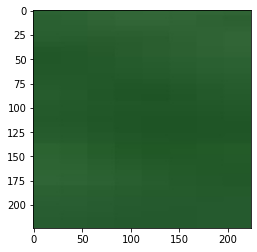

In [4]:
rand = random.randint(0,num)
img_show = imgs[rand]
plt.imshow(img_show)
len(imgs)



In [5]:
X_train, X_test , y_train, y_test = train_test_split(np.array(imgs),np.array(labels),test_size=0.10)

In [6]:
print((np.array(labels)).shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
(np.array(imgs)).shape


(12854, 1)
(11568, 224, 224, 3)
(1286, 224, 224, 3)
(11568, 1)
(1286, 1)


(12854, 224, 224, 3)

In [7]:
resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape=(224,224,3), pooling = 'max')

In [8]:
for layers in (resnet.layers)[:30]:
    print(layers)
    layers.trainable = False

In [9]:
model = Sequential()
from keras import regularizers

In [10]:
model.add(resnet)
model.add(Flatten())
model.add(Dense(32,activation= tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1,activation= tf.nn.sigmoid))

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [12]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [13]:
BATCH_SIZE = 64
train_generator= datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)


In [14]:
batch_size = 32

In [15]:
X_train.shape

(11568, 224, 224, 3)

In [16]:


# Create a callback that saves the model's weights
checkpoint = tf.keras.callbacks.ModelCheckpoint('tomato_classifier_model.h5', verbose=1,
                                                save_best_only=True)



In [17]:
EPOCHS = 20
model = keras.models.load_model("tomato_classifier_model.h5")

In [18]:
model.fit_generator(train_generator, validation_data= (X_test, y_test),steps_per_epoch=BATCH_SIZE ,epochs=EPOCHS,callbacks=[checkpoint])




C:\Users\MaximusX\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\MaximusX\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\MaximusX\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
64/64 [==============================] - 58s 723ms/step - loss: 0.2739 - accuracy: 0.9236 - val_loss: 0.2470 - val_accuracy: 0.9253

Epoch 00001: val_loss improved from inf to 0.24703, saving model to tomato_classifier_model.h5


C:\Users\MaximusX\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
64/64 [==============================] - 49s 760ms/step - loss: 0.2689 - accuracy: 0.9228 - val_loss: 0.2814 - val_accuracy: 0.9215

Epoch 00002: val_loss did not improve from 0.24703
Epoch 3/20
64/64 [==============================] - 53s 829ms/step - loss: 0.2581 - accuracy: 0.9248 - val_loss: 0.2677 - val_accuracy: 0.9300

Epoch 00003: val_loss did not improve from 0.24703
Epoch 4/20
64/64 [==============================] - 50s 777ms/step - loss: 0.2659 - accuracy: 0.9238 - val_loss: 0.2289 - val_accuracy: 0.9370

Epoch 00004: val_loss improved from 0.24703 to 0.22891, saving model to tomato_classifier_model.h5
Epoch 5/20
64/64 [==============================] - 51s 785ms/step - loss: 0.2638 - accuracy: 0.9268 - val_loss: 0.2312 - val_accuracy: 0.9425

Epoch 00005: val_loss did not improve from 0.22891
Epoch 6/20
64/64 [==============================] - 50s 775ms/step - loss: 0.2528 - accuracy: 0.9289 - val_loss: 0.2323 - val_accuracy: 0.9362

Epoch 00006: val_loss did no

In [22]:
model.save_weights('model_weights.h5')
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 45.72%


In [20]:
new_model = keras.models.load_model("tomato_classifier_model.h5")

In [21]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.49%
